# Amazon Top 50 Bestselling Books 2009 - 2019


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 자료 확인

In [2]:
book_data = pd.read_csv("bestsellers with categories.csv")
book_data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## 의문점: 같은 책에 대해서는 어떻게 처리를 할까?
책의 이름이나 작가명, 장르는 변하지 않는다. 하지만 그 나머지에 대해서는 3가지 경우로 나누어서 생각해볼 수 있다.

가정:
1. 년도만 바꾸고 User rating, Reviews, Prices는 동일하게 처리
2. 년도마다 User rating, Prices는 평균을 내고 Reviews는 더한다.
3. 년도마다 따로 계산한다.
4. 이름은 같으나 다른 책이 존재한다.

따라서
동일한 제목을 가진 Reviews, Prices, Authors, User rating에 대해 데이터를 확인해본다.

## case1. 같은 책의 Review

In [3]:
# case1. 같은 책의 Review
# 같은 책에서 Review 수가 다른 경우가 존재할 경우 그 책들의 데이터를 출력했다.

count = 0
name_count = book_data.groupby(["Name"]).count()
long_years_books = list(name_count[name_count["Author"] > 1].index)
for name in long_years_books:
    name_book_data = book_data[book_data["Name"] == name]
    if name_book_data["Reviews"].iloc[0] != name_book_data["Reviews"].mean():
        example = name_book_data
        count += 1

print("case의 개수: {}개".format(count))
example

case의 개수: 1개


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


### case1 분석
- 책이 개편되어 Price가 바뀌었을 때, 동일한 책을 새로운 책으로 가정하여 데이터를 추출한 것으로 보인다.  
그렇지 아니한 경우는, 년도가 바뀌어도 Review수는 변하지 않음으로 총 리뷰수를 합산하여 각 행마다 데이터를 추가한 것으로 보인다.
- 경우가 1개이기 때문에 단순 오류일 가능성도 있다.

## case2. 같은 책의 Price

In [4]:
# case2. 같은 책의 Price 비교
# 같은 책에서 Price가 다른 경우가 존재할 경우 그 책들의 데이터를 출력했다.

count = 0
name_count = book_data.groupby(["Name"]).count()
long_years_books = list(name_count[name_count["Author"] > 1].index)
for name in long_years_books:
    name_book_data = book_data[book_data["Name"] == name]
    if name_book_data["Price"].iloc[0] != name_book_data["Price"].mean():
        example = name_book_data
        count += 1
       
print("case의 개수: {}개".format(count))
example

case의 개수: 9개


,Name,Author,User Rating,Reviews,Price,Year,Genre
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2011,Non Fiction
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2012,Non Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


### case2 분석
- case1에서는 책이 개편된 경우를 추론할 수 있다. 하지만 이 경우에는, 책이 단순하게 가격인하를 통해 변경되었기에 Price를 제외한 다른 특성은 년도에 따라 동일함을 알 수 있다.
- 가격이 변동된 케이스의 책은 9종류가 있다.

## case3. 같은 책의 Author

In [5]:
# case3. 같은 책의 Author 비교
# 같은 책에서 Author가 다른 경우가 존재할 경우 그 책들의 데이터를 출력했다.

name_count = book_data.groupby(["Name"]).count()
long_years_books = list(name_count[name_count["Author"] > 1].index)
for name in long_years_books:
    name_book_data = book_data[book_data["Name"] == name]
    if name_book_data["Author"].iloc[0] != name_book_data["Author"].iloc[1]:
        print("같은 책에 다른 작가가 존재한다")
else:
    print("같은 책에 다른 작가는 없다.")

같은 책에 다른 작가는 없다.


### case3 분석
책의 제목이 동일하다면 같은 작가이다. (동일 제목이지만, 다른 책의 경우는 없다.)

## case4. 같은 책의 User rating

In [6]:
# case3. 같은 책의 User rating 비교
# 같은 책에서 User rating가 다른 경우가 존재할 경우 그 책들의 데이터를 출력했다.

count = 0
name_count = book_data.groupby(["Name"]).count()
long_years_books = list(name_count[name_count["Author"] > 1].index)
for name in long_years_books:
    name_book_data = book_data[book_data["Name"] == name]
    if abs(name_book_data["User Rating"].iloc[0] - name_book_data["User Rating"].mean()) >= 1e-9:
        count += 1

print("case의 개수: {}개".format(count))

case의 개수: 1개


### case4 분석
- case1의 경우와 동일한 경우이다.

## 자료 확인 결과
- 같은 책에 대해서 여러번 반복하는 경우가 있다.
- 책이 개편된 경우는 새로운 책으로 간주하여 Review와 Price를 계산한다.
- 전체적인 경향성을 분석할 때는 변형하지 않고 데이터를 이용한다.
- 년도 별로 비교할 경우, 기존의 데이터를 사용한다. 

# 데이터의 가설
1. fiction이 non-fiction보다 평균 review수가 높을 것이다. 
    - fiction의 경우 쉽게 재미와 느낀 점을 말할 수 있어 review를 많이 달 것이다.
    - non-fiction의 경우 전공서적과 같은 학습용 교재도 포함하기에 review가 상대적으로 적을 것이다.
2. 해를 거듭할수록 Review 수가 줄어든다.
    - 사람들이 정보 및 오락을 유투브, 구글 등의 인터넷을 통해 얻는다.
    - 따라서 책을 적게 읽고, Reivew를 올릴 확률이 줄어든다.

## 가설1. 검증

In [21]:
# Total numbers of Fiction / Non Fiction
# 같은 책을 반복해서 count한 경우

book_data.groupby(['Genre']).mean()[["Reviews"]]

,Reviews
Genre,
Fiction,15683.791667
Non Fiction,9065.145161


In [8]:
# 같은 책은 평균값으로 Count한 경우 -> 전자에 비해 정확한 정보

book_data.groupby(['Name', 'Genre']).mean().groupby(['Genre']).mean()[["Reviews"]]

,Reviews
Genre,
Fiction,13111.068750
Non Fiction,7015.427076


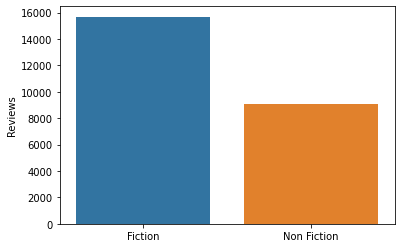

In [9]:
# 평균값으로 Count한 경우의 Reviews 비교

sns.barplot(
    data= book_data.groupby(['Genre']).mean(),
    x= ["Fiction", "Non Fiction"],
    y= "Reviews"
)
plt.show()

## 가설2. 검증

In [10]:
# 년도별 Reivews 수 총합
book_data.groupby(["Year"]).sum()

,User Rating,Reviews,Price
Year,,,
2009,229.2,235506,770
2010,227.9,273981,674
2011,227.9,405041,755
2012,226.6,654546,765
2013,227.7,654907,730
2014,231.1,792997,732
2015,232.4,711669,521
2016,233.9,709800,659
2017,233.0,644420,569


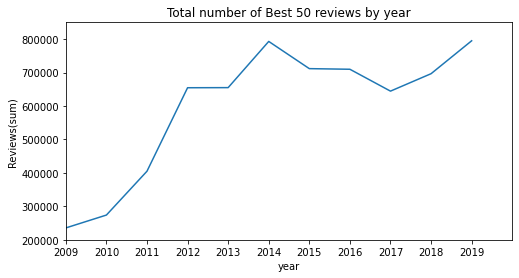

In [20]:
plt.figure(figsize=(8, 4))

plt.title("Total number of Best 50 reviews by year")
plt.axis([2009, 2020, 200000, 850000])
plt.xticks(range(2009, 2020))
plt.yticks(range(200000, 900000, 100000))
plt.xlabel("year")
plt.ylabel("Reviews(sum)")

plt.plot(range(2009, 2020), book_data.groupby(["Year"]).sum()["Reviews"])
plt.show()

## 가설 분석
### 가설1.
- 가설1의 경우에는 예측과 동일하게 Fiction의 평균 Review 수가 Non-Fiction의 Review 수보다 높았다.
- 다만 가설1을 뒷받침하는 증거를 어느 정도 뒷받침할 수 있다.

### 가설2.
- 가설2의 경우에는 예측과는 정반대의 결과가 나왔다.
- 해가 지날수록 Review 수는 상승하는 곡선을 그린다.
- 그 이유를 추론하자면, 해가 지날수록 인터넷의 발달로 독자들이 책의 리뷰를 작성하기 쉬워졌기 때문이다.  
2009년에 비해 2019년 인터넷 사용이 활발해졌기에, 더 많은 Review 수가 나왔다고 추론한다.